In [1]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError


In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
df = np.loadtxt(url, delimiter=',')

print(df)

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [3]:
df.shape


(768, 9)

In [4]:
x = df[:,:8]
y = df[:,8]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [6]:
print(f"x train shape{X_train.shape}")
print(f"y train shape{y_train.shape}")
print(f"x test shape{X_test.shape}")
print(f"y test shape{y_test.shape}")
print(f"x val shape{X_val.shape}")
print(f"y val shape{y_val.shape}")

x train shape(614, 8)
y train shape(614,)
x test shape(77, 8)
y test shape(77,)
x val shape(77, 8)
y val shape(77,)


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [8]:
from collections import Counter
Counter(y)

Counter({np.float64(1.0): 268, np.float64(0.0): 500})

In [9]:
import seaborn as sns

<Axes: ylabel='count'>

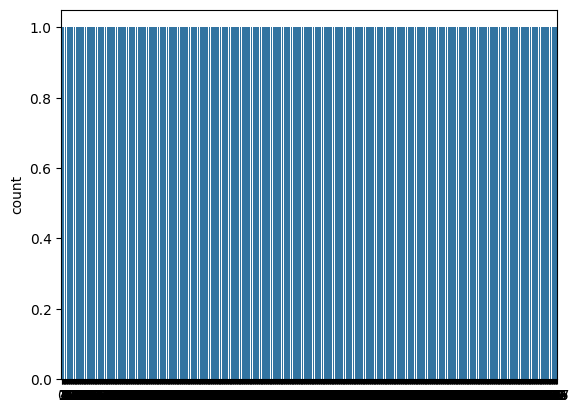

In [10]:
sns.countplot(y)

In [15]:
model = Sequential([

tf.keras.layers.InputLayer(input_shape=(8,)),
Dense(50,activation='relu'),

Dense(50,activation='relu'),
Dense(50,activation='relu'),
Dense(50,activation='relu'),

Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,151 (31.84 KB)

 Trainable params: 8,151 (31.84 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [18]:
history = model.fit(x=x,y=y,epochs=300, batch_size=50,validation_data=(X_val,y_val))

Epoch 1/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6176 - loss: 0.9736 - val_accuracy: 0.5844 - val_loss: 0.6906
Epoch 2/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5257 - loss: 0.8313 - val_accuracy: 0.5714 - val_loss: 0.6900
Epoch 3/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5920 - loss: 0.6985 - val_accuracy: 0.5974 - val_loss: 0.6895
Epoch 4/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6214 - loss: 0.6831 - val_accuracy: 0.5714 - val_loss: 0.6891
Epoch 5/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6631 - loss: 0.6309 - val_accuracy: 0.5714 - val_loss: 0.6886
Epoch 6/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6552 - loss: 0.6367 - val_accuracy: 0.5714 - val_loss: 0.6881
Epoch 7/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6957 - loss: 0.6284 - val_accuracy: 0.5844 - val_loss: 0.6876
Epoch 8/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6903 - loss: 0.6310 - val_accuracy: 0.5974 - 

<Axes: >

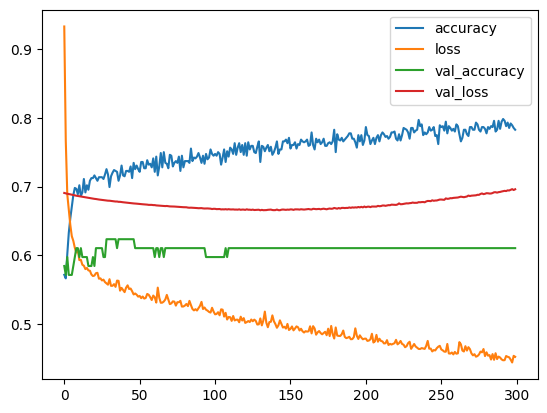

In [19]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [20]:
model.evaluate(x,y)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7731 - loss: 0.4640 


[0.43958723545074463, 0.8020833134651184]

In [21]:
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


In [22]:
y_pred

array([[0.32085952],
       [0.3383136 ],
       [0.17404416],
       [0.23315565],
       [0.28603286],
       [0.20629852],
       [0.1536202 ],
       [0.29275915],
       [0.35398823],
       [0.2610074 ],
       [0.19706082],
       [0.286538  ],
       [0.20753866],
       [0.26999536],
       [0.20318913],
       [0.2769159 ],
       [0.25347686],
       [0.29585713],
       [0.22518638],
       [0.42811108],
       [0.2952656 ],
       [0.34992933],
       [0.2643396 ],
       [0.23656489],
       [0.26190695],
       [0.27210417],
       [0.2790912 ],
       [0.21853796],
       [0.2685397 ],
       [0.26199937],
       [0.26698872],
       [0.22350629],
       [0.34207302],
       [0.28523317],
       [0.3108879 ],
       [0.42549354],
       [0.33805433],
       [0.21850595],
       [0.24740414],
       [0.2724429 ],
       [0.24513863],
       [0.19827345],
       [0.39222854],
       [0.28149864],
       [0.22002104],
       [0.2501085 ],
       [0.2562754 ],
       [0.377